In [1]:
%matplotlib inline 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib.pyplot as plt; plt.rcdefaults() 
import pandas.plotting as scatter_matrix 
import ast
from wordcloud import WordCloud, STOPWORDS 
import pygal
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
data_main= pd.read_csv(r"C:\Users\diyas\Documents\Recommendation_system\combinedFinalMasterDataset_updatedSoftwareTools.csv") 

In [3]:
data_main.columns

Index(['Unnamed: 0', 'USN', '10thPercentage', '12thPercentage', 'AwardsNLP',
       'Branch', 'CGPA', 'CTC', 'CoCurricularActivities', 'CompanyNameNLP',
       'CoreCourseGrade', 'CoreCourseName', 'CourseGrade', 'CourseName',
       'ElectiveCourseGrade', 'ElectiveCourseName', 'EmploymentType',
       'ExternalCertificatesDomain', 'ExternalCertificatesKey',
       'GeneralSkills', 'GitHubLink', 'InternshipCompany',
       'InternshipProjectDomain', 'LanguagesNLP', 'LinkedInLink',
       'MinorAttended', 'Name', 'NoofInternships', 'NoofProjects',
       'NumberOfOffers', 'OtherDetails', 'ProgLanguages',
       'ProjectDetailDomain', 'PublicationNLP', 'ResearchDomain',
       'ScholarshipsNLP', 'SoftwareTools', 'Stipend(K)', 'TierLevel',
       'VolunteeringWork', 'WorkshopsDomain', 'WorkshopsOrg'],
      dtype='object')

In [5]:
class EDAPreProcessing:
    def __init__(self, masterData):
        self.masterData = masterData
        
    def boxplotCGPA(self,df):
        temp=df.drop(columns=['Unnamed: 0', 'Name', 'USN'])
        return temp

In [91]:
class BasicAttributeWiseEDA:
    def __init__(self, masterData):
        self.masterData = masterData
    
    def boxplotCGPA(self,df):
        print("BOXPLOT FOR CGPA")
        path2 = pd.DataFrame(df.CGPA) 
        ax = path2.plot.box() 
        plt.show() 
        mean=np.mean(df["CGPA"])
        print("Overall CGPA MEAN",mean)
        print("\n \n")
        
    def histCTC(self,df):
        print("HISTOGRAM FOR CTC")
        df["CTC"] = df["CTC"].fillna(0).astype(int)
        print(df.hist(column=["CTC"]))
        print("\n \n")
        
    def hist10th(self,df):
        print("HISTOGRAM FOR 10th")
        df["10thPercentage"] = df["10thPercentage"].fillna(0).astype(int)
        print(df.hist(column=["10thPercentage"]))
        print("\n \n")
        
    def hist12th(self,df):
        print("HISTOGRAM FOR 12th")
        df["12thPercentage"] = df["12thPercentage"].fillna(0).astype(int)
        print(df.hist(column=["12thPercentage"]))
        print("\n \n")
        
    def histCGPA(self,df):
        print("HISTOGRAM FOR CGPA")
        df["CGPA"] = df["CGPA"].fillna(0).astype(int)
        print(df.hist(column=["CGPA"]))
        print("\n \n")
        
    def wordcloudCompany(self,df):
        #wordcloud for Company Names
        print("Wordcloud for Company Names")
        for i in ['CompanyNameNLP']: 
            df[i] = df[i].replace(np.nan," ") 
            df[i]= df[i].replace("nan"," ")
            df[i]= df[i].replace("NaN"," ")
        comment_words = ' '
        stopwords = set(STOPWORDS) 
        # iterate through the csv file 
        for val in df.CompanyNameNLP: 
            # typecaste each val to string 
            val = str(val) 
            # split the value 
            tokens = val.split() 
            # Converts each token into lowercase 
            for i in range(len(tokens)): 
                tokens[i] = tokens[i].lower() 
            for words in tokens: 
                comment_words = comment_words + words + ' '
        wordcloud = WordCloud(width = 500, height = 500, 
                        background_color ='white', 
                        stopwords = stopwords, 
                        min_font_size = 10).generate(comment_words) 
        # plot the WordCloud image                        
        plt.figure(figsize = (5, 5), facecolor = None) 
        plt.imshow(wordcloud) 
        plt.axis("off") 
        plt.tight_layout(pad = 0) 
        plt.show() 
        
    def barplotEmploymentType(self,df):
        df.groupby(['EmploymentType','TierLevel'])['EmploymentType'].size().unstack().plot(kind='bar',stacked=True)
        plt.show()
        
    def pieTierCount(self,df):
        #piechart for tier 
        df["TierLevel"] = df["TierLevel"].astype(str)
        p1=df["TierLevel"].str.count("1").sum() 
        p2=df["TierLevel"].str.count("2").sum() 
        p3=df["TierLevel"].str.count("3").sum() 
        path3= pd.DataFrame({'TierLevel': [p1,p2,p3]},index=['Tier 1','Tier 2','Tier 3']) 
        plot = path3.plot.pie(y='TierLevel', figsize=(5,5)) 
        plt.show()
        
    def pieScholarship(self,df):
        s={}
        df['ScholarshipsNLP']=df['ScholarshipsNLP'].str.split('##')
        for i,k in df.iterrows():
            n=[]
            #print(df.ScholarshipsNLP[i])
            if(df.ScholarshipsNLP[i]!='' and type(df.ScholarshipsNLP[i])!=float):
                for j in k.ScholarshipsNLP:
                    #print(j)
                    if type(j)!=float:
                        if j not in s:
                            s[j] = 1
                        else:
                            s[j] =s[j] + 1
        fig = plt.figure(figsize =(10, 7)) 
        print(plt.pie(list(s.values())[0:3], labels = list(s.keys())[0:3]))
        
    def tierLevelDistribution(self,df):
        #Tier level distribution
        df.groupby('TierLevel')['CTC'].nunique().plot(kind='bar')
        plt.xlabel('Tier Level') 
        plt.ylabel('Count') 
        plt.title('Tier Level distribution')  
        plt.show()
        
    def companyDistribution(self,df):
        #Tier level distribution
        df.groupby('CompanyNameNLP')['CTC'].nunique().plot(kind='bar')
        plt.xlabel('Count') 
        plt.ylabel('Tier Level') 
        plt.title('Tier Level distribution')  
        plt.show()
        

In [130]:
class advancedColumnWiseCountEDA:
    def __init__(self, masterData):
        self.masterData = masterData
    
    def projectDomain(self,df):
        #project domain count
        df['LanguagesNLP']=df['LanguagesNLP'].str.split('##')
        l=df['LanguagesNLP'].value_counts()
        df['ProjectDetailDomain']=df['ProjectDetailDomain'].str.split('##')
        proj={}
        for i,k in df.iterrows():
            n=[]
            if(df.ProjectDetailDomain[i]!='' and type(df.ProjectDetailDomain[i])!=float):
                for j in df.ProjectDetailDomain[i]:
                    if j not in l and type(j)!=float:
                        if j not in proj:
                            proj[j] = 1
                        else:
                            proj[j] =proj[j] + 1
        plt.barh(list(proj.keys()),list(proj.values()), align='center', alpha=0.6) 
        plt.xlabel('Count') 
        plt.ylabel('Project domains') 
        plt.title('Project domains of placed students') 
        
        
    def researchDomain(self,df):
        #research domain count
        df['LanguagesNLP']=df['LanguagesNLP'].str.split('##')
        l=df['LanguagesNLP'].value_counts()
        df['ResearchDomain']=df['ResearchDomain'].str.split('##')
        research={}
        for i,k in df.iterrows():
            if(df.ResearchDomain[i]!='' and type(df.ResearchDomain[i])!=float):
                for j in df.ResearchDomain[i]:
                    if j not in l and type(j)!=float:
                        if j not in research:
                            research[j] = 1
                        else:
                            research[j] =research[j] + 1

        plt.barh(list(research.keys()),list(research.values()), align='center', alpha=0.6) 
        plt.xlabel('Count') 
        plt.ylabel('Research domains') 
        plt.title('Research domains of placed students') 
        
    def tools(self,df):
        df['SoftwareTools']=df['SoftwareTools'].str.split('##')
        tools={}
        for i,k in df.iterrows():
            n=[]
            if(df.SoftwareTools[i]!='' and type(df.SoftwareTools[i])!=float):
                for j in df.SoftwareTools[i]:
                    if type(j)!=float:
                        if j not in tools:
                            tools[j] = 1
                        else:
                            tools[j] =tools[j] + 1
        plt.barh(list(tools.keys())[0:10],list(tools.values())[0:10], align='center', alpha=0.6) 
        plt.xlabel('Count') 
        plt.ylabel('Software Tools') 
        plt.title('Top Software Tools for Placed students')  
        
        
    def progLang(self,df):
        df['ProgLanguages']=df['ProgLanguages'].str.split('##')
        p={}
        for i,k in df.iterrows():
            n=[]
            if(df.ProgLanguages[i]!='' and type(df.ProgLanguages[i])!=float):
                for j in df.ProgLanguages[i]:
                    if type(j)!=float:
                        if j not in p:
                            p[j] = 1
                        else:
                            p[j] =p[j] + 1
        plt.barh(list(p.keys())[0:10],list(p.values())[0:10], align='center', alpha=0.6) 
        plt.xlabel('Count') 
        plt.ylabel('Programming Languages') 
        plt.title('Top Programming Languages for Placed students') 
        
    def externalCertificates(self,df):
        df['ExternalCertificatesKey']=df['ExternalCertificatesKey'].str.split('##')
        e={}
        for i,k in df.iterrows():
            n=[]
            if(df.ExternalCertificatesKey[i]!='' and type(df.ExternalCertificatesKey[i])!=float):
                for j in df.ExternalCertificatesKey[i]:
                    if type(j)!=float:
                        if j not in e:
                            e[j] = 1
                        else:
                            e[j] =e[j] + 1
        e.pop('')
        plt.barh(list(e.keys())[0:10],list(e.values())[0:10], align='center', alpha=0.6) 
        plt.xlabel('Count') 
        plt.ylabel('External Certificates') 
        plt.title('Top External Certificates taken by Placed students')
        
    def externalCertificatesDomain(self,df):
        df['ExternalCertificatesDomain']=df['ExternalCertificatesDomain'].str.split('##')
        e={}
        for i,k in df.iterrows():
            n=[]
            if(df.ExternalCertificatesDomain[i]!='' and type(df.ExternalCertificatesDomain[i])!=float):
                for j in df.ExternalCertificatesDomain[i]:
                    if type(j)!=float:
                        if j not in e:
                            e[j] = 1
                        else:
                            e[j] =e[j] + 1
        e.pop('')
        plt.barh(list(e.keys())[0:10],list(e.values())[0:10], align='center', alpha=0.6) 
        plt.xlabel('Count') 
        plt.ylabel('External Certificates Domain') 
        plt.title('Top External Certificates Domain taken by Placed students')
        
    def generalCode(self,df,var):
        df[var]=df[var].str.split('##')
        e={}
        for i,k in df.iterrows():
            n=[]
            if(df[var][i]!='' and type(df[var][i])!=float):
                for j in df[var][i]:
                    if type(j)!=float:
                        if j not in e:
                            e[j] = 1
                        else:
                            e[j] =e[j] + 1
        e.pop('')
        plt.barh(list(e.keys())[0:10],list(e.values())[0:10], align='center', alpha=0.6) 
        plt.xlabel('Count') 
        plt.ylabel(var) 
        title=var+"  taken by Placed students"
        plt.title(title)


In [ ]:
class TierWiseStratificationEDA:
    

In [ ]:
class GradesEDA:
    

In [131]:
#PERPROCESSING 
a=EDAPreProcessing(data_main)
df=a.filterColumns(data_main)

HISTOGRAM FOR 12th
[[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C813B7CDD8>]]

 



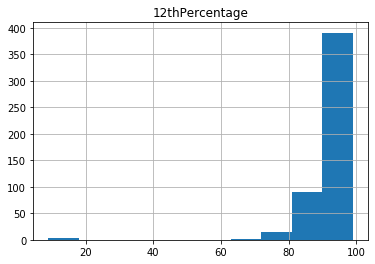

In [93]:
# BasicAttributeWiseEDA
b= BasicAttributeWiseEDA(df)
#b.boxplotCGPA(df)
#b.hist12th(df)
#b.hist10th(df)
#b.barplotEmploymentType(df)
#b.pieTierCount(df)
#b.wordcloudCompany(df)
#b.pieScholarship(df)
#b.tierLevelDistribution(df)
#b.companyDistribution(df)

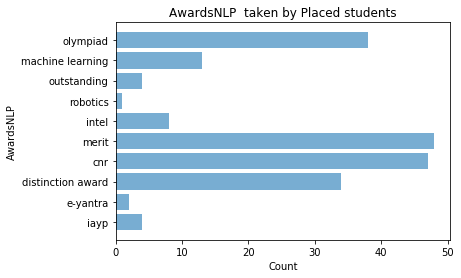

In [132]:
c= advancedColumnWiseCountEDA(df)
#c.projectDomain(df)
#c.researchDomain(df)
#c.tools(df)
#c.progLang(df)
#c.externalCertificates(df)
#c.externalCertificatesDomain(df)
#c.generalCode(df,'AwardsNLP')